# CNN Methods

In [11]:
#=========================================== CNN ============================================================
import cv2
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D,MaxPool2D,BatchNormalization
from mpl_toolkits.axes_grid1 import AxesGrid
from sklearn.metrics import confusion_matrix
from keras.optimizers import SGD
%matplotlib inline

**1. CNN callback**

In [14]:
# ==============================callback function:learning rate annealer=================#
from keras.callbacks import ReduceLROnPlateau
learning_rate = ReduceLROnPlateau(monitor = 'val_acc',
                                 patience = 3,
                                 factor = 0.5,
                                 min_lr = 0.001)

**2. CNN final model**<br>
Whithout data augmentation, the accuracy is already 97%. pretty good!!

In [35]:
batch_size = 32
epochs = 40
num_classes = 13
img_rows, img_cols = X_train.shape[1],X_train.shape[2]
input_shape = (img_rows, img_cols, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(256, (3, 3), padding='same')) 
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# define optimizer: SGD
opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# compile model
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
#fit model and get all the accuracy and loss history values
model_history = model.fit(X_train,Y_trainHot, batch_size = batch_size,epochs = epochs, validation_data = [X_test, Y_testHot], callbacks = [learning_rate])

score = model.evaluate(X_test,Y_testHot, verbose=0)
print('CNN accuracy:', score[1])
print('')
y_pred = model.predict(X_test)
print('\n', sklearn.metrics.classification_report(np.where(Y_testHot > 0)[1], np.argmax(y_pred, axis=1), target_names=list(dict_characters.values())), sep='')    


Train on 12776 samples, validate on 641 samples
Epoch 1/40
12776/12776 [==============================] - 419s 33ms/step - loss: 2.1640 - acc: 0.2707 - val_loss: 1.7898 - val_acc: 0.4072
Epoch 2/40
12776/12776 [==============================] - 403s 32ms/step - loss: 1.5450 - acc: 0.5077 - val_loss: 1.1986 - val_acc: 0.6131
Epoch 3/40
12776/12776 [==============================] - 406s 32ms/step - loss: 1.1936 - acc: 0.6247 - val_loss: 0.8711 - val_acc: 0.7317
Epoch 4/40
12776/12776 [==============================] - 387s 30ms/step - loss: 0.9807 - acc: 0.6911 - val_loss: 0.7339 - val_acc: 0.7847
Epoch 5/40
12776/12776 [==============================] - 386s 30ms/step - loss: 0.8403 - acc: 0.7381 - val_loss: 0.6682 - val_acc: 0.8081
Epoch 6/40
12776/12776 [==============================] - 387s 30ms/step - loss: 0.7297 - acc: 0.7711 - val_loss: 0.5239 - val_acc: 0.8378
Epoch 7/40
12776/12776 [==============================] - 388s 30ms/step - loss: 0.6651 - acc: 0.7983 - val_loss: 0.39

<function matplotlib.pyplot.show>

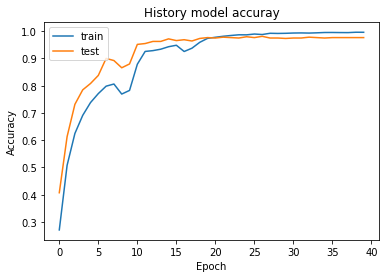

In [36]:
# ================================plot history model 2 accuracy===============================================#
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('History model accuray')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'], loc = 'upper left')
plt.show

<function matplotlib.pyplot.show>

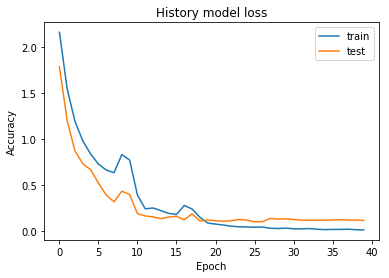

In [38]:
# ================================plot history model 2 loss===============================================#
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('History model loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'], loc = 'upper right')
plt.show

**ADD AUGMENTATION**

Model 3 which has data augmentation

In [48]:
batch_size = 32
epochs = 50
num_classes = 13
img_rows, img_cols = X_train.shape[1],X_train.shape[2]
input_shape = (img_rows, img_cols, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(256, (3, 3), padding='same')) 
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# define optimizer
opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# compile model
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
# data augmentation
datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False)  # randomly flip images
datagen.fit(X_train)
#fit model and get all the accuracy and loss history values
model_history = model.fit_generator(datagen.flow(X_train,Y_trainHot, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test, Y_testHot),
                              steps_per_epoch=X_train.shape[0] // batch_size, callbacks=[learning_rate])
score = model.evaluate(X_test,Y_testHot, verbose=0)
print('CNN accuracy:', score[1])
print('')
y_pred = model.predict(X_test)
# get model report: precision, recall, F1 score
print('\n', sklearn.metrics.classification_report(np.where(Y_testHot > 0)[1], np.argmax(y_pred, axis=1), target_names=list(dict_characters.values())), sep='')    


Epoch 1/50
399/399 [==============================] - 401s 1s/step - loss: 2.3018 - acc: 0.2189 - val_loss: 1.8116 - val_acc: 0.4041
Epoch 2/50
399/399 [==============================] - 430s 1s/step - loss: 1.7729 - acc: 0.4272 - val_loss: 1.3205 - val_acc: 0.5913
Epoch 3/50
399/399 [==============================] - 443s 1s/step - loss: 1.4418 - acc: 0.5362 - val_loss: 0.9524 - val_acc: 0.6911
Epoch 4/50
399/399 [==============================] - 457s 1s/step - loss: 1.1936 - acc: 0.6215 - val_loss: 0.8778 - val_acc: 0.7379
Epoch 5/50
399/399 [==============================] - 461s 1s/step - loss: 1.0272 - acc: 0.6797 - val_loss: 0.7200 - val_acc: 0.7629
Epoch 6/50
399/399 [==============================] - 430s 1s/step - loss: 0.9413 - acc: 0.7008 - val_loss: 0.5974 - val_acc: 0.8190
Epoch 7/50
399/399 [==============================] - 430s 1s/step - loss: 0.8669 - acc: 0.7280 - val_loss: 0.5952 - val_acc: 0.8081
Epoch 8/50
399/399 [==============================] - 411s 1s/step - 

<function matplotlib.pyplot.show>

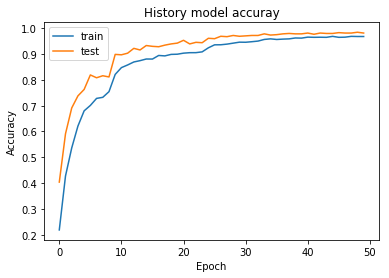

In [49]:
# ================================plot history model3 accuracy===============================================#
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('History model accuray')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'], loc = 'upper left')
plt.show

<function matplotlib.pyplot.show>

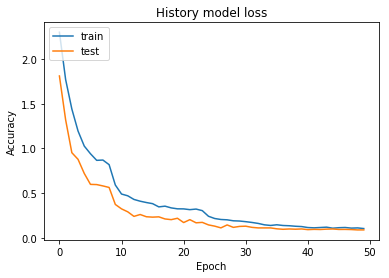

In [50]:
# ================================plot history model3 loss===============================================#
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('History model loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'], loc = 'upper left')
plt.show